<a href="https://colab.research.google.com/github/Smeya-mohanan/bank-model-/blob/main/banking_modl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load dataset and display features and a few samples
df1 = pd.read_csv("../home/bank-full.csv")
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df1['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
# checking the size of the dataset
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 45211 rows and 17 columns


In [ ]:
#checking if there are any null values in the dataset
df1.isnull().sum()*100/df1.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [ ]:
#Encoding data 

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

df1_c = df1.copy()
for col in df1.columns[df1.dtypes=="object"]:
    df1_c[col]=encoder.fit_transform(df1_c[col])
df1_c.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


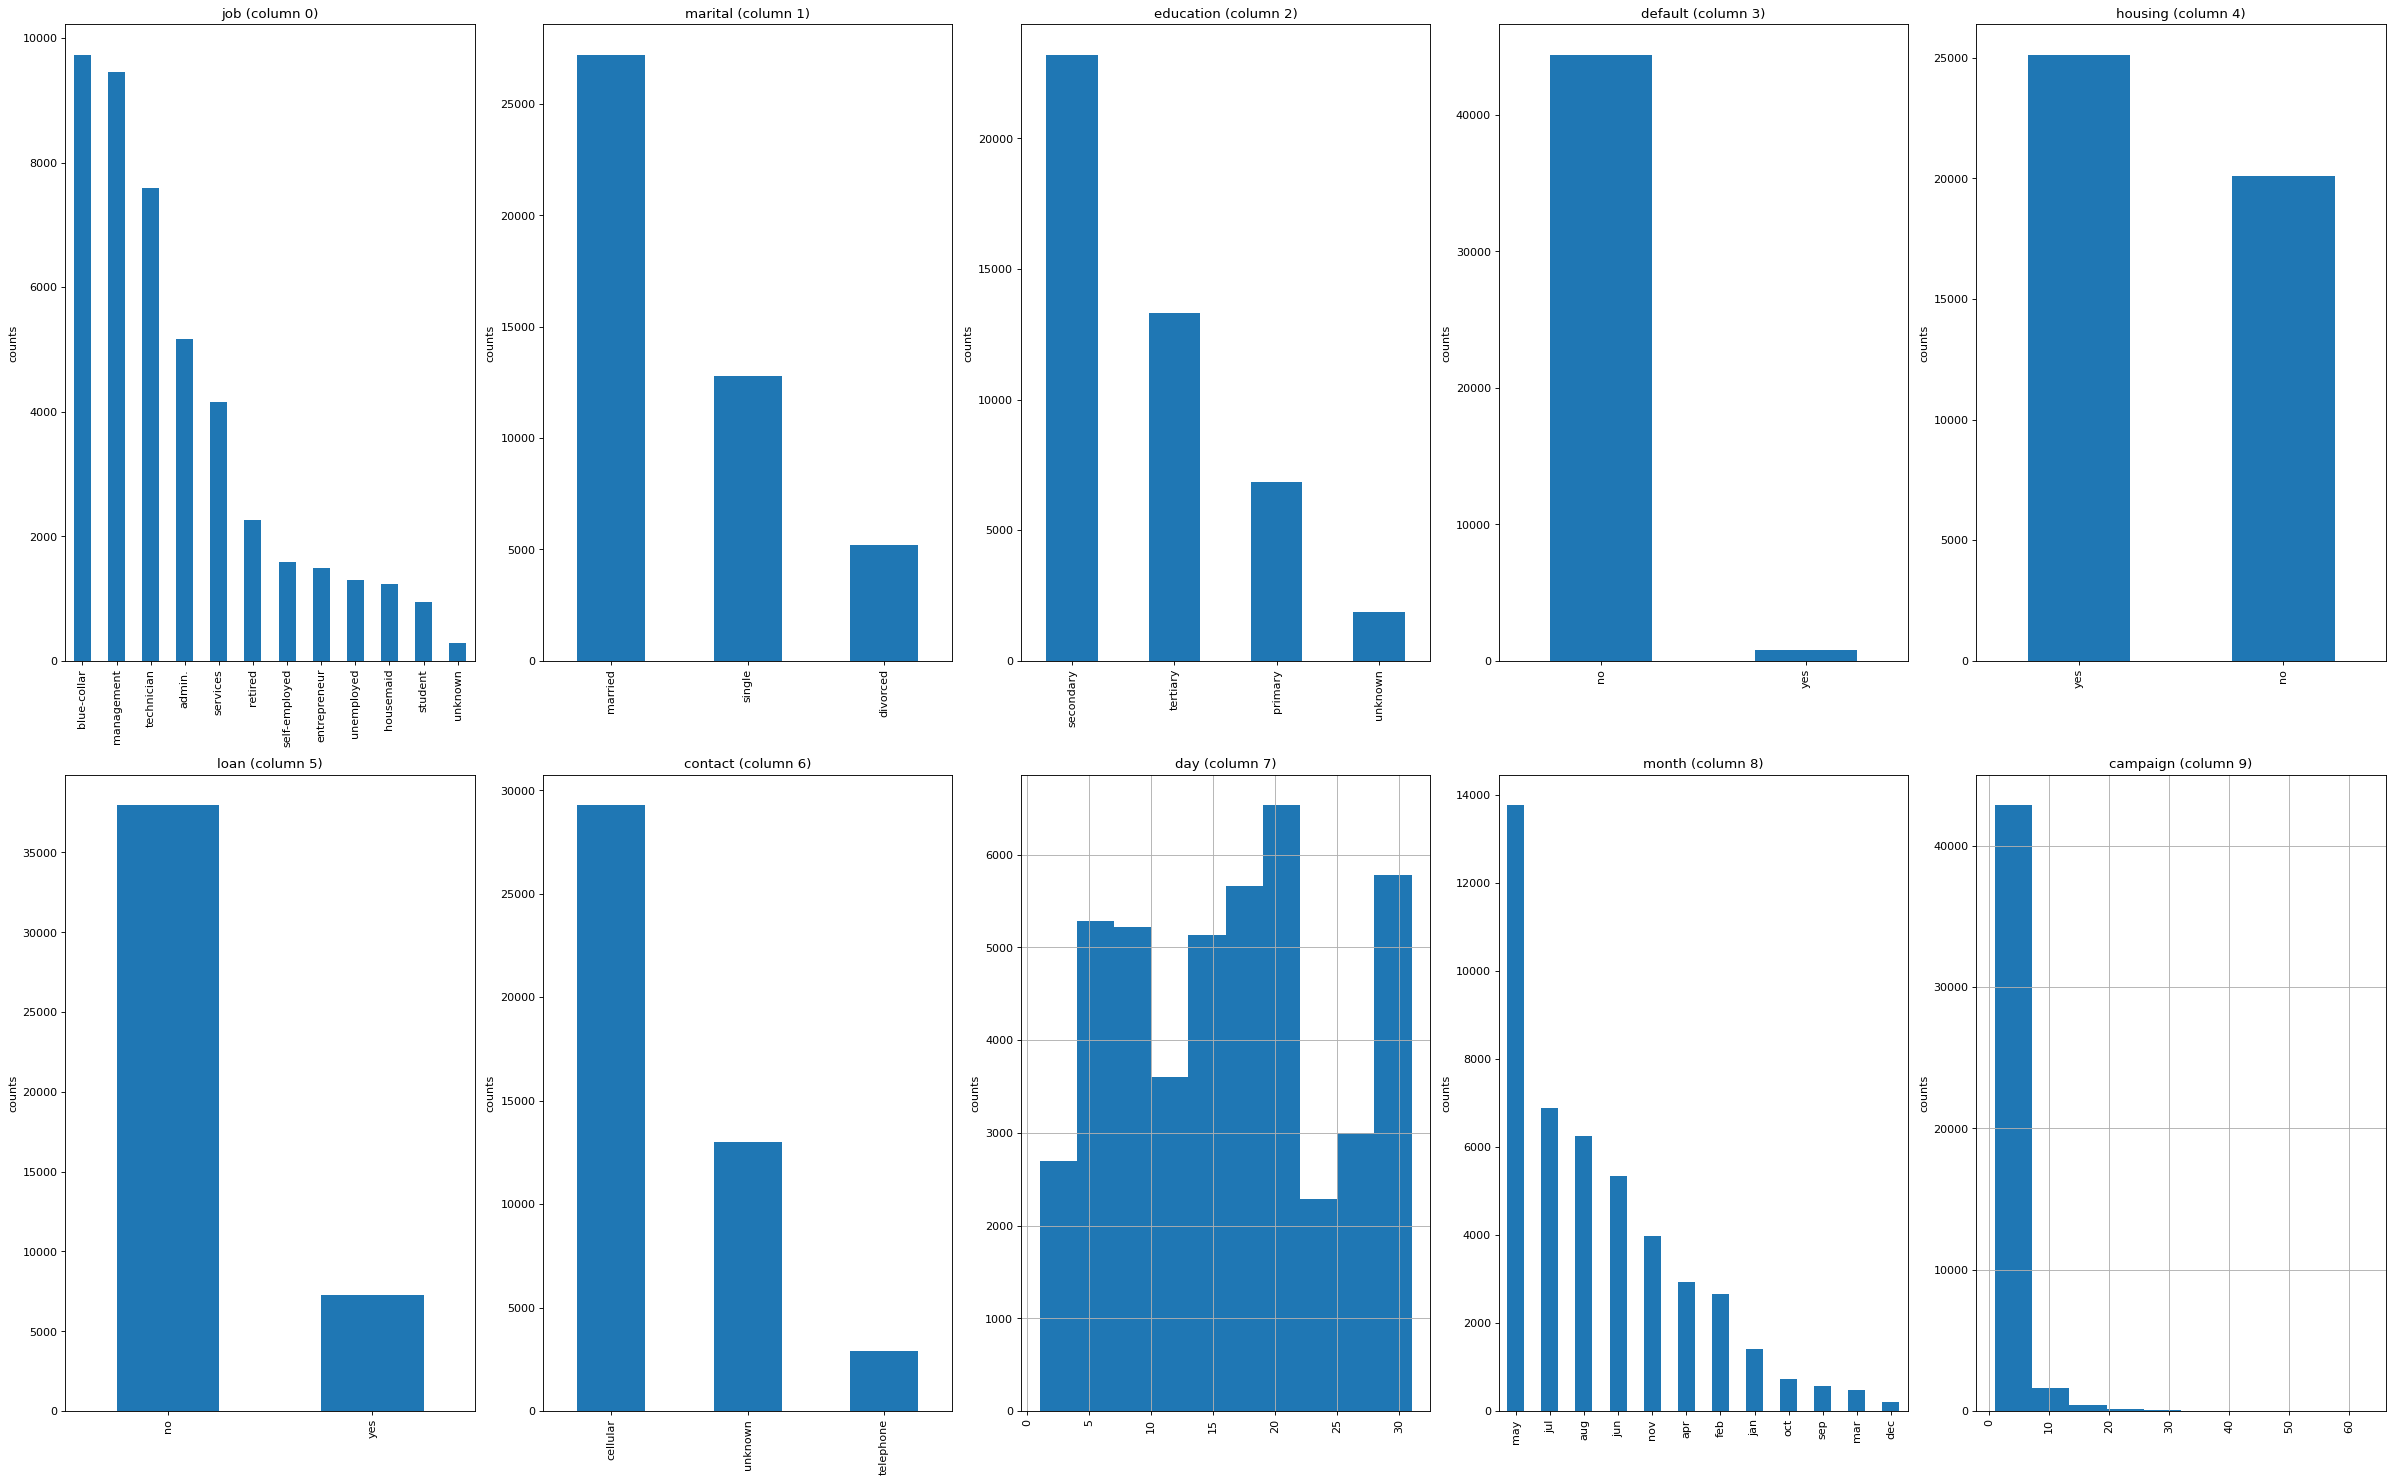

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df1, 10, 5)

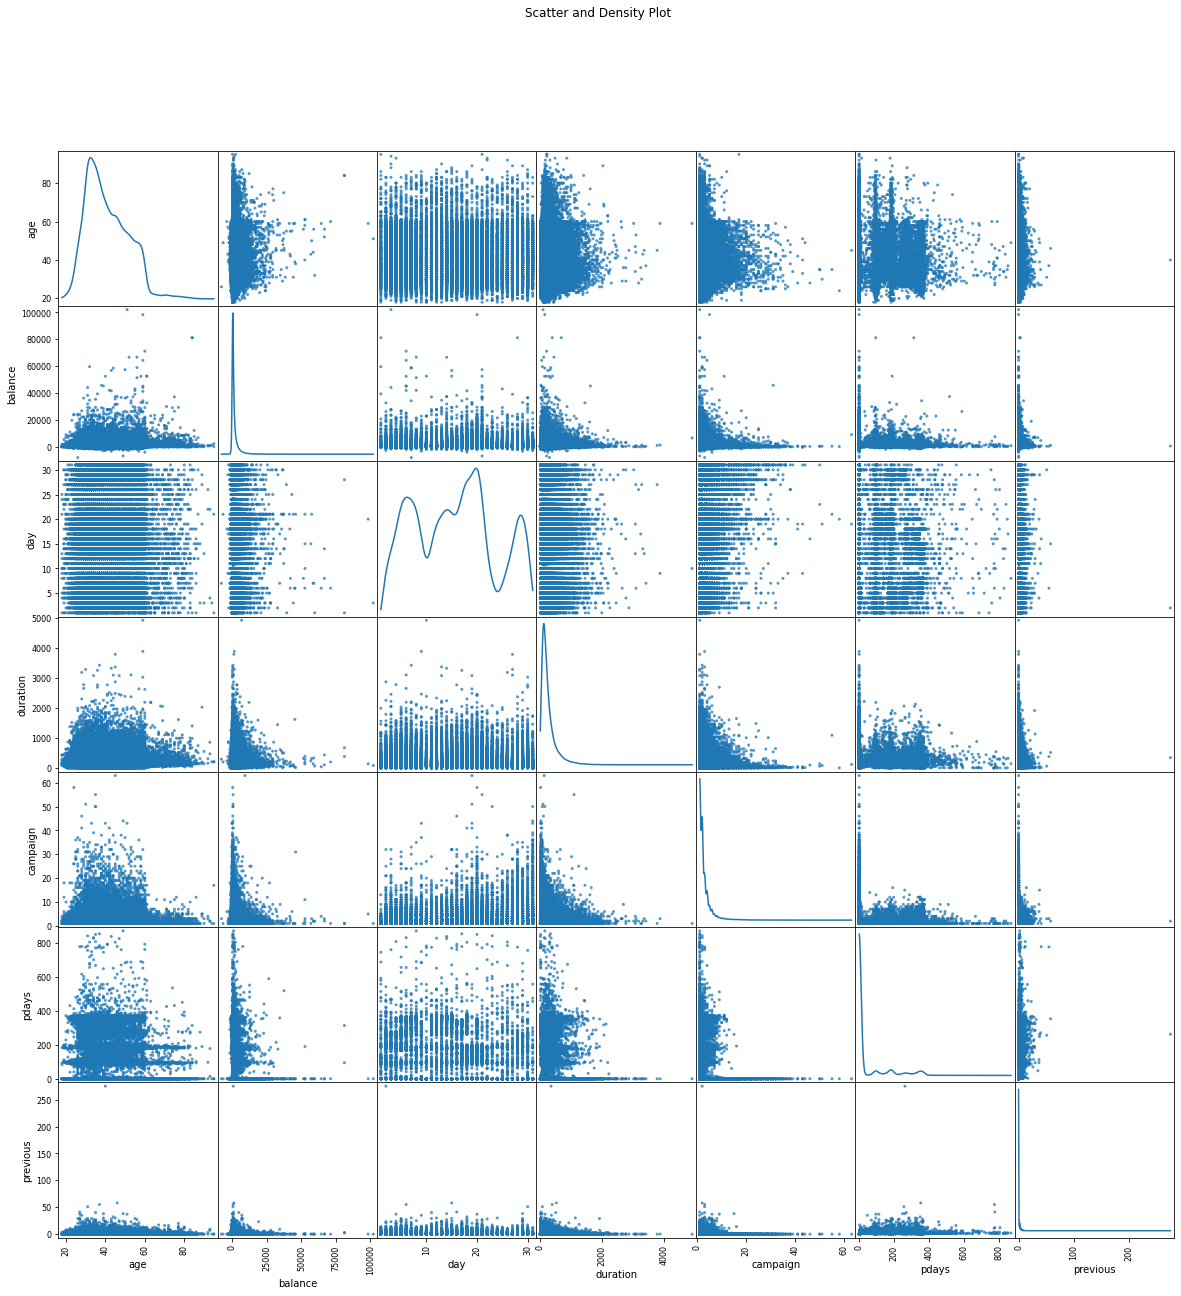

In [ ]:
# Scatter and density plots
df = df1.select_dtypes(include =[np.number]) # keep only numerical columns
# Remove rows and columns that would lead to df being singular
df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
columnNames = list(df)
if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    columnNames = columnNames[:10]
df = df[columnNames]
ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[20, 20], diagonal='kde')
plt.suptitle('Scatter and Density Plot')
plt.show()


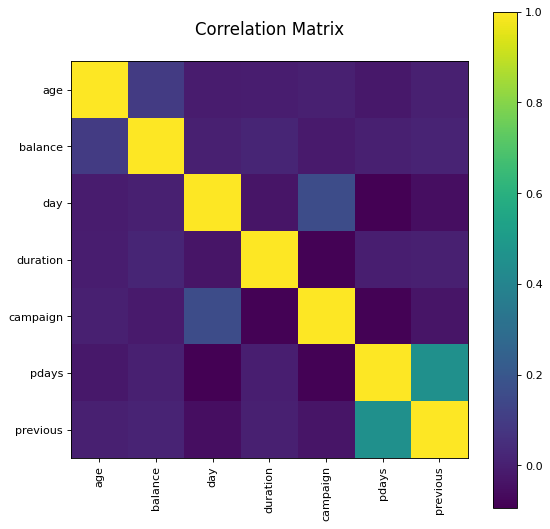

In [ ]:
# Correlation matrix

df = df1.dropna('columns') # drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
if df.shape[1] < 2:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
corr = df.corr()
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()

In [ ]:
X,y = df1_c.iloc[:,:-1],df1_c.iloc[:,-1]

In [ ]:
#Gaussian Naive Bayes Classification

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

print(classification_report(y_test,y_pred))

Number of mislabeled points out of a total 9043 points : 1436
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      7980
           1       0.36      0.45      0.40      1063

    accuracy                           0.84      9043
   macro avg       0.64      0.67      0.65      9043
weighted avg       0.86      0.84      0.85      9043



In [ ]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.805
[0.00000000e+00 9.40733772e-04 5.64440263e-03 ... 9.99059266e-01
 1.00000000e+00 1.00000000e+00]


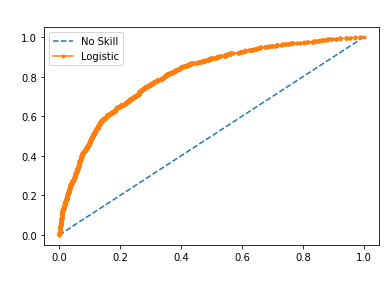

In [ ]:
# roc curve and auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
print(lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('Gaussian NB ROC Curve',color= 'white', size =20)
# axis labels
pyplot.xlabel('False Positive Rate',color= 'white')
pyplot.ylabel('True Positive Rate',color= 'white')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
import time
start_time = time.time()
corr_matrix = df1_c.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes
print("Time taken:" + str(time.time() - start_time) + " seconds")
# Now we will look at the correlation of all the attributes with the expected class attribute when the email in not a spam.


Time taken:0.04006481170654297 seconds


In [ ]:
#Displayng the Correlation matrix per class
print(abs(corr_matrix['y']).sort_values(ascending=False))


y            1.000000
duration     0.394521
contact      0.148395
housing      0.139173
pdays        0.103621
previous     0.093236
poutcome     0.077840
campaign     0.073172
loan         0.068185
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
day          0.028348
age          0.025155
month        0.024471
default      0.022419
Name: y, dtype: float64


In [ ]:
#Prediction gets displayed along correclating features 
    #so one more is added to each group to get the correct numbers of correslating features
corr_target = abs(corr_matrix["y"])
top2 = corr_target.nlargest(3)
top5= corr_target.nlargest(6)
top10 = corr_target.nlargest(11)
print('Top correlating features: \n\n Top 2: {} \n\n Top 5: {} \n\n Top 10: {}'.format(top2,top5,top10))

Top correlating features: 

 Top 2: y           1.000000
duration    0.394521
contact     0.148395
Name: y, dtype: float64 

 Top 5: y           1.000000
duration    0.394521
contact     0.148395
housing     0.139173
pdays       0.103621
previous    0.093236
Name: y, dtype: float64 

 Top 10: y            1.000000
duration     0.394521
contact      0.148395
housing      0.139173
pdays        0.103621
previous     0.093236
poutcome     0.077840
campaign     0.073172
loan         0.068185
education    0.066241
balance      0.052838
Name: y, dtype: float64


In [ ]:
X2 = df1_c.loc[:,['duration', 'contact']]
Y = df1_c.iloc[:,-1]
x_train2,x_test2,y_train2,y_test2 = train_test_split(X2,Y,test_size=0.5)



gnb = GaussianNB()
y_pred = gnb.fit(x_train2, y_train2).predict(x_test2)
print("Number of mislabeled points out of a total %d points : %d"% (x_test2.shape[0], (y_test2 != y_pred).sum()))

print(classification_report(y_test2,y_pred))



Number of mislabeled points out of a total 22606 points : 2515
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     19935
           1       0.56      0.27      0.37      2671

    accuracy                           0.89     22606
   macro avg       0.73      0.62      0.65     22606
weighted avg       0.87      0.89      0.87     22606



In [ ]:
X5 = df1_c.loc[:,['duration', 'contact','housing','pdays','previous']]
Y = df1_c.iloc[:,-1]
x_train5,x_test5,y_train5,y_test5 = train_test_split(X5,Y,test_size=0.5)



gnb = GaussianNB()
y_pred = gnb.fit(x_train5, y_train5).predict(x_test5)
print("Number of mislabeled points out of a total %d points : %d"% (x_test5.shape[0], (y_test5 != y_pred).sum()))

print(classification_report(y_test5,y_pred))

Number of mislabeled points out of a total 22606 points : 2598
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     19960
           1       0.51      0.32      0.39      2646

    accuracy                           0.89     22606
   macro avg       0.71      0.64      0.66     22606
weighted avg       0.87      0.89      0.87     22606



In [ ]:
X10 = df1_c.loc[:,['duration', 'contact','housing','pdays','previous','poutcome','campaign','loan','education','balance']]
Y = df1_c.iloc[:,-1]
x_train10,x_test10,y_train10,y_test10 = train_test_split(X10,Y,test_size=0.5)



gnb = GaussianNB()
y_pred = gnb.fit(x_train10, y_train10).predict(x_test10)
print("Number of mislabeled points out of a total %d points : %d"% (x_test10.shape[0], (y_test10 != y_pred).sum()))

print(classification_report(y_test10,y_pred))

Number of mislabeled points out of a total 22606 points : 3538
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     19910
           1       0.36      0.40      0.38      2696

    accuracy                           0.84     22606
   macro avg       0.64      0.65      0.64     22606
weighted avg       0.85      0.84      0.85     22606



Conclusion: The accuracy drops slightly from 89% to 88% and 85% with respective to the increase in the datas provided in three dataset.Overall with the 17 features and by choosing the top 3 datasets,the accuracy level is overall 84%. The top 5 correlating features didn't make much difference in accuracy comparitively to Top 3 because the words are repititve.However,the top 10 features makes a vast difference in accuracy as the new words are quite different from each other such as 'poutcome','campaign','loan','education' and 'balance'.As a result,the features mentioned are more reliable.


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)



#print(classification_report(y_test,y_pred))

   age  job  marital  education  ...  campaign  pdays  previous  poutcome
0   58    4        1          2  ...         1     -1         0         3
1   44    9        2          1  ...         1     -1         0         3
2   33    2        1          1  ...         1     -1         0         3
3   47    1        1          3  ...         1     -1         0         3
4   33   11        2          3  ...         1     -1         0         3

[5 rows x 16 columns]


***Part 2 - KMeans, EM Algorithm, Elbow, Siloutte***




K-Means Clustering Accuracy: 0.14640242418880361


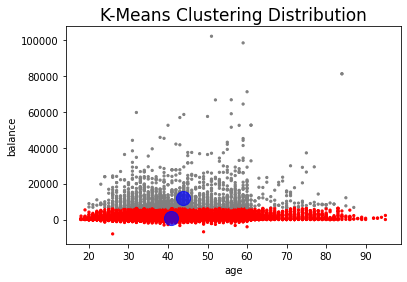

<Figure size 720x432 with 0 Axes>

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
y_pred_kmeans = kmeans.predict(X)
print('K-Means Clustering Accuracy: {}'.format(accuracy_score(Y, y_pred_kmeans)))
feature1_n = 0
feature2_n = 5

colors = []
for i in y_pred_kmeans:
  if i == 0:
    colors.append('grey')
  elif i == 1:
    colors.append('red')
#plt.axes().set(facecolor = 'xkcd:white')
plt.scatter(X.iloc[:, feature1_n], X.iloc[:, feature2_n], c=colors, s=5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, feature1_n], centers[:, feature2_n], color= 'blue', s=200, alpha=0.7)
plt.title('K-Means Clustering Distribution', size =17)
# axis labels
pyplot.xlabel(X.iloc[:, feature1_n].name)
pyplot.ylabel(X.iloc[:, feature2_n].name)
#plt.rcParams["figure.figsize"] = (10,6)
plt.figure(figsize = (10,6))
plt.show()



Starting clustering using K-Means algorithm...
Calculating clusters when k is 2
Calculating clusters when k is 3
Calculating clusters when k is 4

The mean of accuracy is: 
[0.         0.85646356 0.80205684 0.76910317]

The SD of accuracy is: 
[0.         0.00368705 0.00419002 0.00443144]


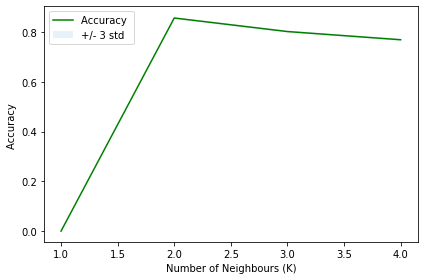


The best accuracy was with 0.8564635629768882 with k= 2


In [ ]:
# random decision - K from 1 to 30
k = 5

print("Starting clustering using K-Means algorithm...")

mean_accuracy = np.zeros((k - 1))
std_accuracy = np.zeros((k - 1))

for i in range(2, k):
    print("Calculating clusters when k is {0}".format(i))

    # training K-Means
    k_means = KMeans(n_clusters= i, random_state = 5).fit(X_train)

    # testing K-Means
    k_means_predict = k_means.predict(X_test)

    centroid_array = k_means.cluster_centers_

    # evaluation metrics
    mean_accuracy[i - 1] = accuracy_score(y_test, k_means_predict)
    std_accuracy[i - 1] = np.std(k_means_predict == y_test) / np.sqrt(k_means_predict.shape[0])

print("\nThe mean of accuracy is: ")
print(mean_accuracy)
print("\nThe SD of accuracy is: ")
print(std_accuracy)

plt.plot(range(1,k),mean_accuracy,'g')
plt.fill_between(range(1,k),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print("\nThe best accuracy was with", mean_accuracy.max(), "with k=", mean_accuracy.argmax()+1)
print("===================================================================================")



In [ ]:
from sklearn.mixture import GaussianMixture

k=6
mean_accuracy_gmm = np.zeros((k - 1))
std_accuracy_gmm = np.zeros((k - 1))

print("Clustering using Gaussian Mixture Model...")

for i in range(2,k):
    gaussian_mixture_full_dataset = GaussianMixture(n_components=i)
    print("GMM for {0}...".format(i))
    gaussian_mixture_full_dataset.fit(X_train)
    gaussian_mixture_full_dataset_predict = gaussian_mixture_full_dataset.predict(X_test)

    mean_accuracy_gmm[i - 1] = accuracy_score(y_test, gaussian_mixture_full_dataset_predict)
    std_accuracy_gmm[i - 1] = np.std(gaussian_mixture_full_dataset_predict == y_test) / np.sqrt(gaussian_mixture_full_dataset_predict.shape[0])


print("\nThe mean of accuracy is: ")
print(mean_accuracy_gmm)
print("\nThe SD of accuracy is: ")
print(std_accuracy_gmm)

print("\nThe best accuracy was with", mean_accuracy_gmm.max(), "with k=", mean_accuracy_gmm.argmax()+1)

probs_gmm = gaussian_mixture_full_dataset.predict_proba(X_train)
print("Gaussian Model probabilities: \n")
print(probs_gmm[:5].round(3))
print("==================================================================================")

Clustering using Gaussian Mixture Model...
GMM for 2...
GMM for 3...
GMM for 4...
GMM for 5...

The mean of accuracy is: 
[0.         0.73294261 0.61472963 0.08194183 0.02576579]

The SD of accuracy is: 
[0.         0.00465244 0.00511763 0.00288424 0.00166608]

The best accuracy was with 0.732942607541745 with k= 2
Gaussian Model probabilities: 

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


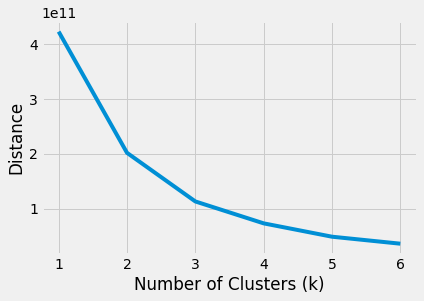

In [ ]:
#Elbow Method
import matplotlib.style as style

range_n_clusters = [1, 2, 3, 4, 5, 6]
avg_distance=[]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
  avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.8431336029602164
For n_clusters = 3 The average silhouette_score is : 0.7715923252335757
For n_clusters = 4 The average silhouette_score is : 0.7333409598520835
For n_clusters = 5 The average silhouette_score is : 0.6869954173353987
For n_clusters = 6 The average silhouette_score is : 0.6327803012661207


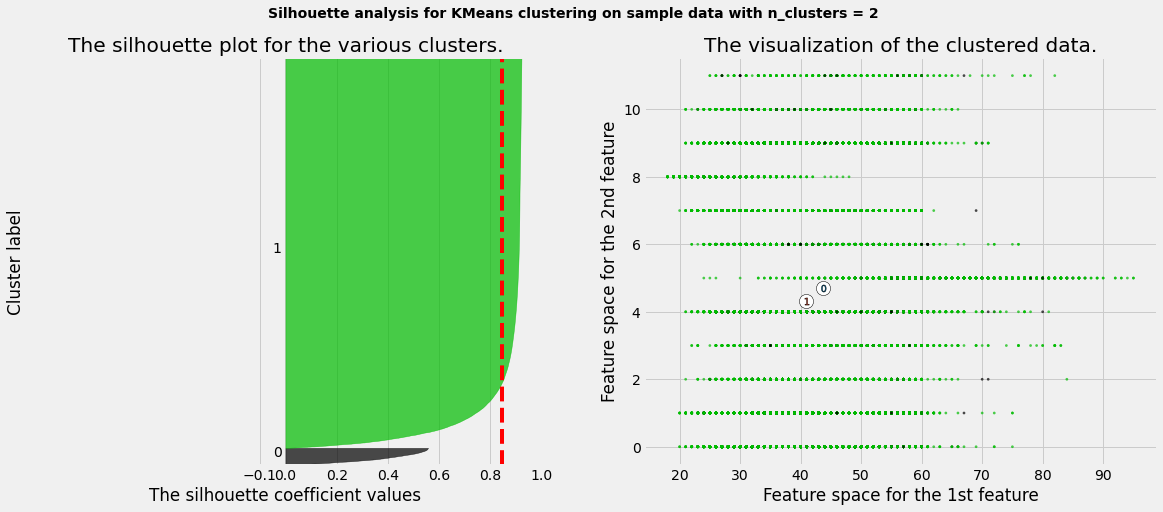

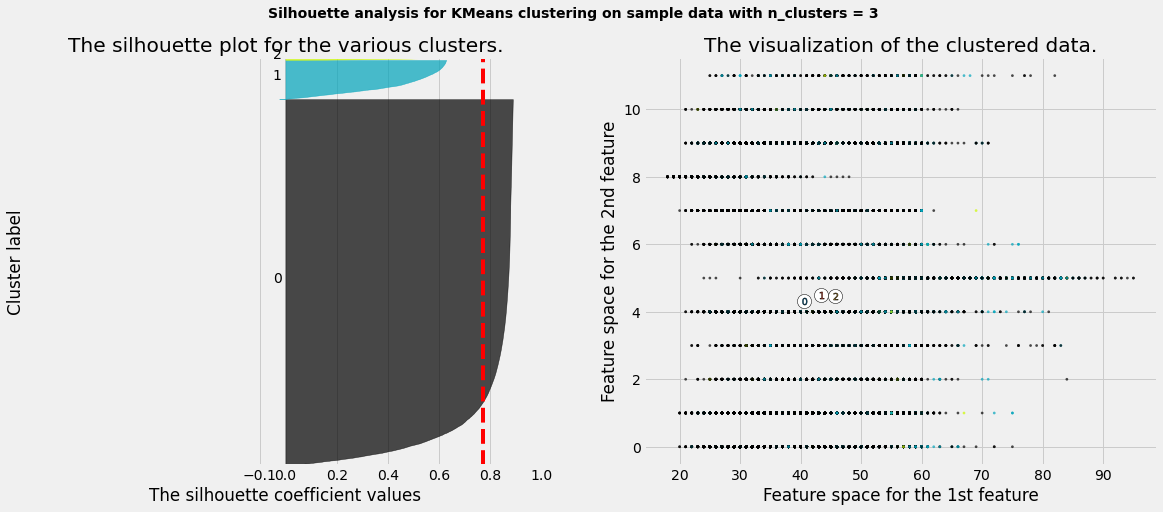

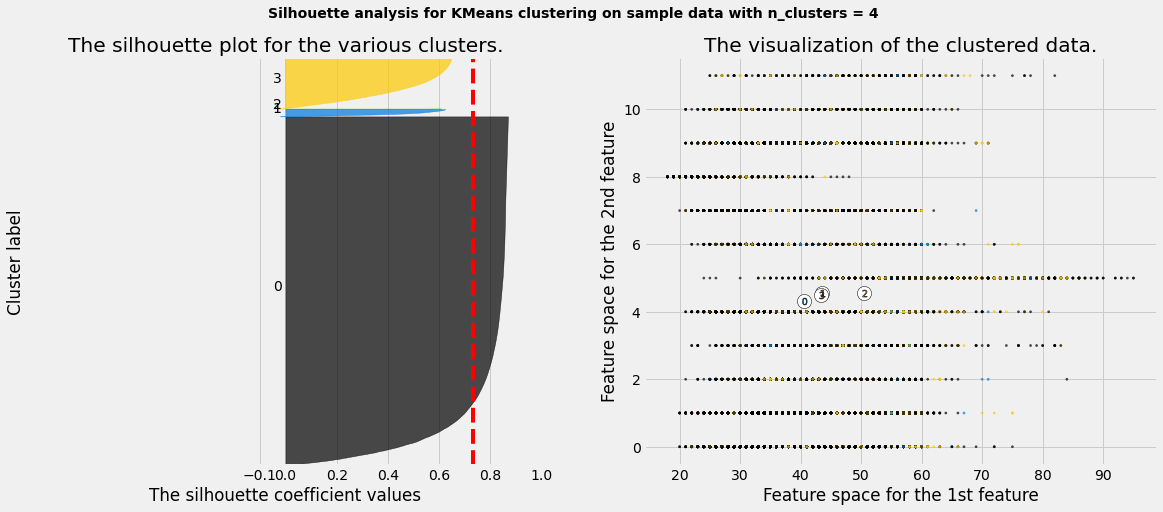

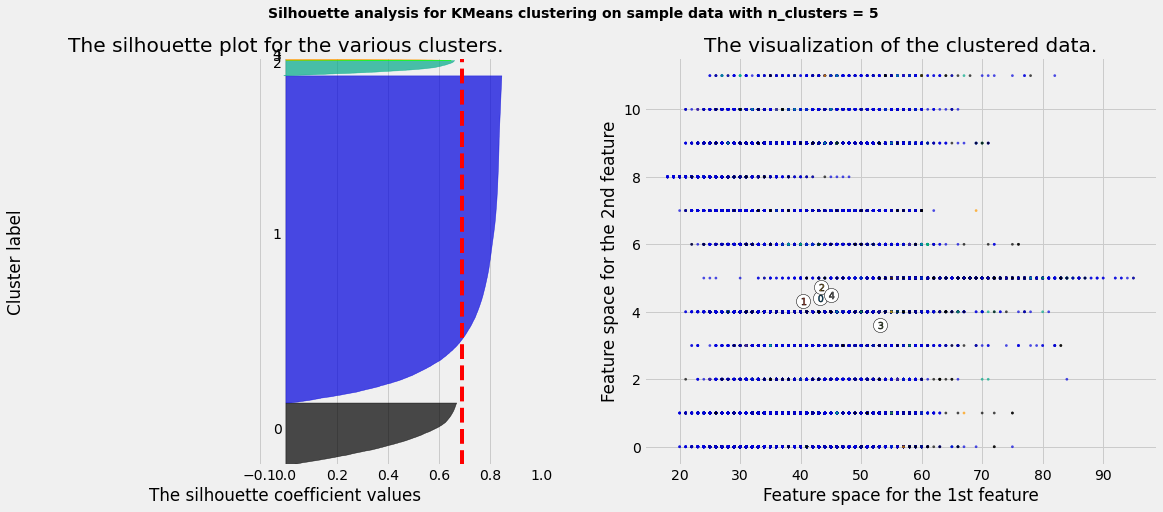

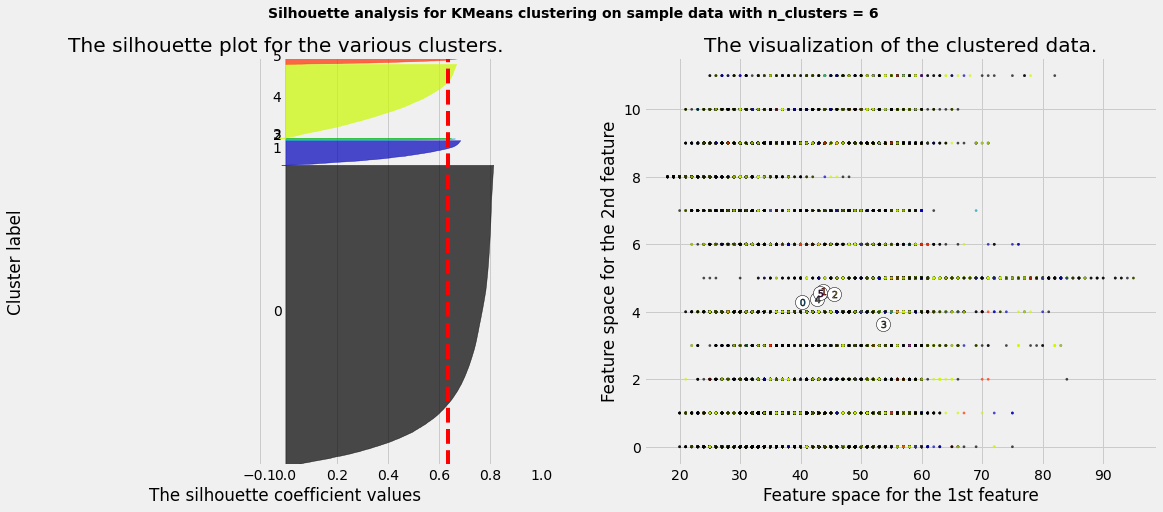

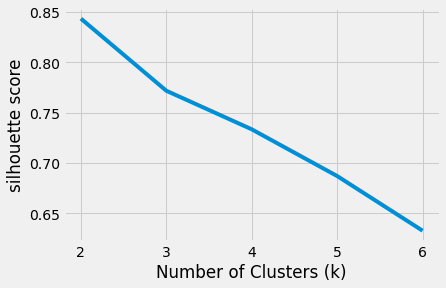

In [ ]:
#Silouette Method

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

***Part 3 - Decision Trees***

decison tree accuracy :  1.0
[[31942     0]
 [    0  4226]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000
[0. 1. 1.]


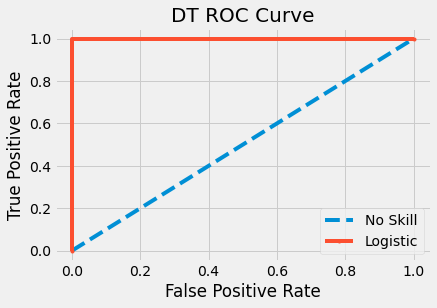

In [ ]:
# Decision Tree on training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
print("decison tree accuracy : ",dt.score(X_train,y_train))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_train,y_train))

results = confusion_matrix(y_train, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
print(lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Accuracy on the 10-fold cross vaildation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print("Accuracies for each fold: ", scores,"\n\n")
print("Mean accuracy on the 10-fold cross vaildation: ", scores.mean())

Accuracies for each fold:  [0.88080495 0.51869056 0.64344172 0.67020571 0.74872816 0.69055519
 0.59898253 0.4069896  0.59942491 0.48484848] 


Mean accuracy on the 10-fold cross vaildation:  0.624267179717904


decison tree accuracy :  0.8686276678093553
[[7357  623]
 [ 565  498]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.695
[0.         0.46848542 1.        ]


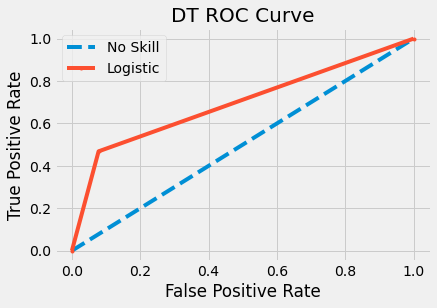

In [ ]:
# Decision Tree on test set
y_pred = dt.predict(X_test)
print("decison tree accuracy : ",dt.score(X_test,y_test))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_test,y_test))

results = confusion_matrix(y_test, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
print(lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

***Decision tree experimentation ***

**Max Depth on training set**

decison tree accuracy :  0.8898473788984738
[[31353   589]
 [ 3395   831]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.715
[0.         0.19663985 0.28632276 0.50709891 1.        ]


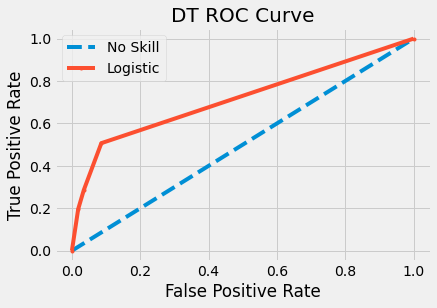

In [ ]:
# Decision Tree with limited depth on training  set 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
print("decison tree accuracy : ",dt.score(X_train,y_train))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_train,y_train))

results = confusion_matrix(y_train, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
print(lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Max Depth on test set**

decison tree accuracy :  0.8877584872276899
[[7823  157]
 [ 858  205]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.713
[0.         0.19285042 0.29633114 0.5098777  1.        ]


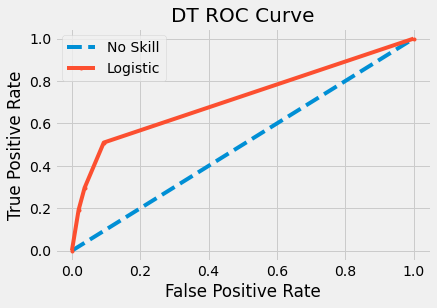

In [ ]:
# Decision Tree with limited depth on test set 

y_pred = dt.predict(X_test)
print("decison tree accuracy : ",dt.score(X_test,y_test))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_test,y_test))

results = confusion_matrix(y_test, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
print(lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Min samples on training set**

decison tree accuracy :  0.902565804025658
[[30874  1068]
 [ 2456  1770]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.917
[0.         0.07359205 0.10884998 0.15759584 0.2056318  0.23710364
 0.26762896 0.30336015 0.33648841 0.36772362 0.39280644 0.41883578
 0.45220066 0.49550402 0.52200663 0.54472314 0.56483673 0.58376716
 0.60104117 0.62872693 0.64481779 0.65925225 0.67628964 0.69072409
 0.70634169 0.72716517 0.74230951 0.75745386 0.76999527 0.77851396
 0.78987222 0.80123048 0.81258874 0.82016091 0.83222906 0.83932797
 0.85210601 0.86346427 0.8715097  0.87908187 0.88547089 0.89138665
 0.89753904 0.906531   0.91173687 0.91646947 0.92072882 0.9252248
 0.92924752 0.93279697 0.9361098  0.94036914 0.94320871 0.9462849
 0.95101751 0.95385708 0.95622338 0.95906294 0.96213914 0.96545196
 0.96758164 0.96947468 0.97278751 0.97468055 0.97775674 0.97941316
 0.98154283 0.98296261 0.98485566 0.98603881 0.98745859 0.98864174
 0.98958826 0.99053478 0.99124468 0.99195457 0.99266446 0.99313772
 0.993610

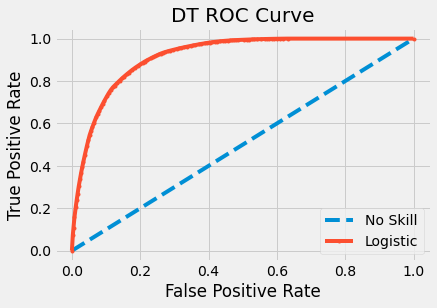

In [ ]:
# Decision Tree with limited depth on training  set 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(min_samples_leaf=200)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
print("decison tree accuracy : ",dt.score(X_train,y_train))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_train,y_train))

results = confusion_matrix(y_train, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
print(lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Min samples on test set**

decison tree accuracy :  0.8925135463894726
[[7648  332]
 [ 640  423]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.897
[0.         0.07996237 0.11194732 0.15145814 0.19755409 0.22671684
 0.25399812 0.2784572  0.31796802 0.34430856 0.37347131 0.39793039
 0.42238946 0.47130762 0.49482596 0.51364064 0.53809972 0.55785513
 0.57572907 0.60112888 0.62652869 0.6378175  0.65569144 0.66792098
 0.68203198 0.70837253 0.72812794 0.74223895 0.75634995 0.75823142
 0.76575729 0.7770461  0.79021637 0.80526811 0.81561618 0.81749765
 0.83254939 0.84007526 0.84477893 0.85418627 0.85700847 0.86453434
 0.86829727 0.87958608 0.88617121 0.88617121 0.89275635 0.89651929
 0.90310442 0.90404516 0.91063029 0.9190969  0.92097836 0.92380056
 0.92850423 0.9332079  0.93508937 0.93508937 0.94355597 0.94637817
 0.94731891 0.94825964 0.95202258 0.95484478 0.95860771 0.95860771
 0.96331138 0.96331138 0.96801505 0.96895579 0.96895579 0.97177799
 0.97271872 0.97365945 0.97365945 0.97365945 0.97365945 0.97554092
 0.9802445

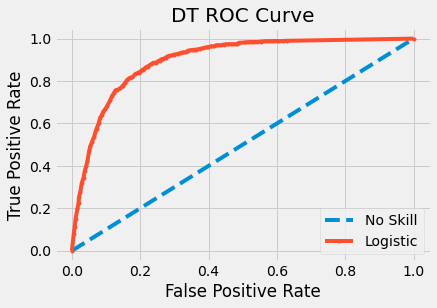

In [ ]:
# Decision Tree with Min samples per leaf on test set 

y_pred = dt.predict(X_test)
print("decison tree accuracy : ",dt.score(X_test,y_test))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_test,y_test))

results = confusion_matrix(y_test, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
print(lr_tpr)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

***Splitting criteria on training set***

decison tree accuracy :  0.9113028091130281
[[30825  1117]
 [ 2091  2135]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.940


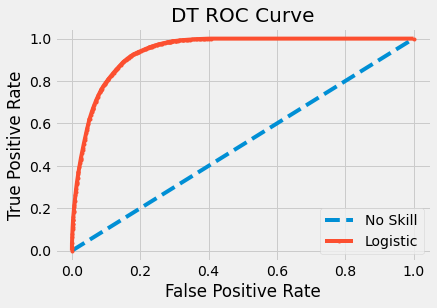

In [ ]:
# Decision Tree with min splitting criteria on training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier(min_samples_split=200)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
print("decison tree accuracy : ",dt.score(X_train,y_train))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_train,y_train))

results = confusion_matrix(y_train, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

***Splitting criteria on test set***

decison tree accuracy :  0.8982638504920933
[[7632  348]
 [ 572  491]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


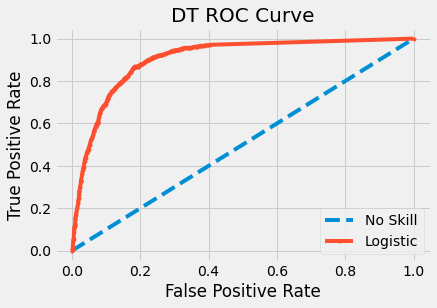

In [ ]:
# Decision Tree with min splitting criteria on test set
y_pred = dt.predict(X_test)
print("decison tree accuracy : ",dt.score(X_test,y_test))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_test,y_test))

results = confusion_matrix(y_test, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

***30% Training set***

decison tree accuracy :  1.0
[[27971     0]
 [    0  3676]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


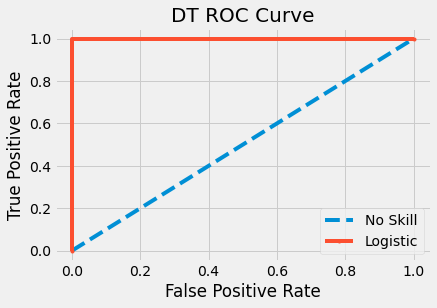

In [ ]:
# Decision Tree with 30% test set on training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
print("decison tree accuracy : ",dt.score(X_train,y_train))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_train,y_train))

results = confusion_matrix(y_train, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

***30% on test set***

decison tree accuracy :  0.872161604246535
[[11094   857]
 [  877   736]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.692


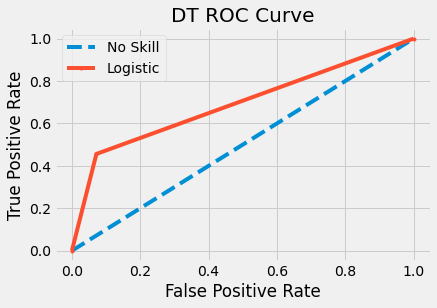

In [ ]:
y_pred = dt.predict(X_test)
print("decison tree accuracy : ",dt.score(X_test,y_test))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_test,y_test))

results = confusion_matrix(y_test, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

***60% on training set***

decison tree accuracy :  1.0
[[16005     0]
 [    0  2079]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


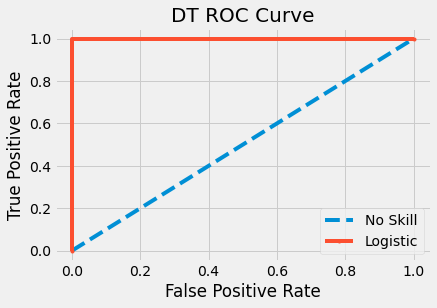

In [ ]:
# Decision Tree with 30% test set on training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.6)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
print("decison tree accuracy : ",dt.score(X_train,y_train))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_train,y_train))

results = confusion_matrix(y_train, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

***60% on test set***

decison tree accuracy :  0.8674383455597744
[[22029  1888]
 [ 1708  1502]]
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.694


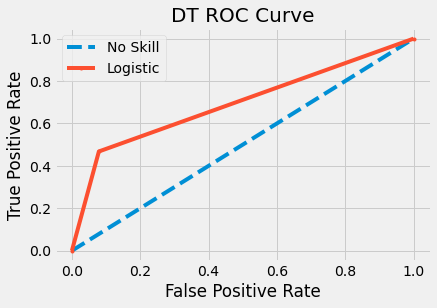

In [ ]:
y_pred = dt.predict(X_test)
print("decison tree accuracy : ",dt.score(X_test,y_test))
labelList = []
resultList = []
# adding result and label to lists
labelList.append("Dec_Tree")
resultList.append(dt.score(X_test,y_test))

results = confusion_matrix(y_test, y_pred)
print(results)

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# plot title
pyplot.title('DT ROC Curve', size =20)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

***Random Forest on training set***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

rfclf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Classification Accuracy:",
      round(accuracy_score(y_train, y_pred), 4),"\n" )


Decision Tree Classification Accuracy: 0.8843 



***Random Forest on test set***

In [ ]:
y_pred = rfclf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Classification Accuracy:",
      round(accuracy_score(y_test, y_pred), 4),"\n" )


Decision Tree Classification Accuracy: 0.8801 



***Part -4***

**LR on training set**

Accuracy of LR on training set is: 0.891561601415616


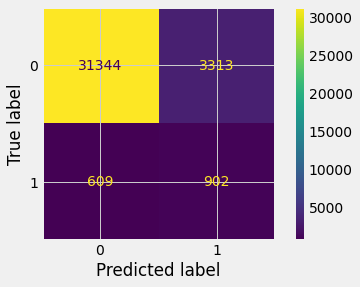

Confusion matrix: 
 TP: 902 
 TN: 31344 
 FP: 3313 
 FN: 609
Precision score: 0.21399762752075918
Recall score: 0.5969556585043018
F measure: 0.31505413901501916


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# fit a model
model = LogisticRegression(solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)
# predict probabilities
y_pred = model.predict(X_train)

print("Accuracy of LR on training set is: {}".format(accuracy_score(y_train,y_pred)))
results = confusion_matrix(y_pred,y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=results, display_labels=model.classes_)
disp.plot()
plt.show()
TN,FP,FN,TP = results.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print('Confusion matrix: \n TP: {} \n TN: {} \n FP: {} \n FN: {}'.format(TP, TN, FP, FN))
print('Precision score: {}'.format(precision))
print('Recall score: {}'.format(recall))
print('F measure: {}'.format(F1))


**LR on test set**

Accuracy of LR on test set is: 0.8889748977109366


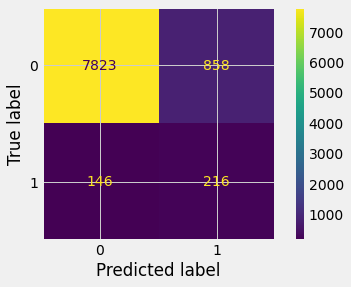

Confusion matrix: 
 TP: 216 
 TN: 7823 
 FP: 858 
 FN: 146
Precision score: 0.2011173184357542
Recall score: 0.5966850828729282
F measure: 0.3008356545961003


In [ ]:
# predict probabilities
y_pred = model.predict(X_test)

print("Accuracy of LR on test set is: {}".format(accuracy_score(y_test,y_pred)))
results = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=results, display_labels=model.classes_)
disp.plot()
plt.show()
TN,FP,FN,TP = results.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print('Confusion matrix: \n TP: {} \n TN: {} \n FP: {} \n FN: {}'.format(TP, TN, FP, FN))
print('Precision score: {}'.format(precision))
print('Recall score: {}'.format(recall))
print('F measure: {}'.format(F1))


***LR with CV on traning set***

Accuracy of LR on traning set with 10-F CV is: 0.8900685689006856


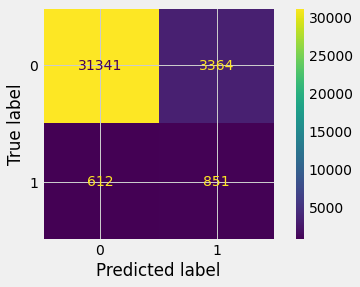

Confusion matrix: 
 TP: 851 
 TN: 31341 
 FP: 3364 
 FN: 612
Precision score: 0.2018979833926453
Recall score: 0.5816814764183186
F measure: 0.2997534343078549


In [ ]:
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")
logreg=LogisticRegression(max_iter=1000)
y_pred = cross_val_predict(logreg, X_train, y_train, cv=10)
print("Accuracy of LR on traning set with 10-F CV is: {}"
      .format(accuracy_score(y_train, y_pred)))
results = confusion_matrix(y_pred,y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=results, display_labels=model.classes_)
disp.plot()
plt.show()
TN,FP,FN,TP = results.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print('Confusion matrix: \n TP: {} \n TN: {} \n FP: {} \n FN: {}'.format(TP, TN, FP, FN))
print('Precision score: {}'.format(precision))
print('Recall score: {}'.format(recall))
print('F measure: {}'.format(F1))

***LR with CV on test set***

Accuracy of LR on test set with 10-F CV is: 0.887316156142873


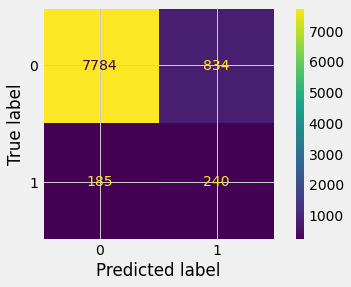

Confusion matrix: 
 TP: 240 
 TN: 7784 
 FP: 834 
 FN: 185
Precision score: 0.22346368715083798
Recall score: 0.5647058823529412
F measure: 0.32021347565043357


In [ ]:
y_pred = cross_val_predict(logreg, X_test, y_test, cv=10)
print("Accuracy of LR on test set with 10-F CV is: {}"
      .format(accuracy_score(y_test, y_pred)))
results = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=results, display_labels=model.classes_)
disp.plot()
plt.show()
TN,FP,FN,TP = results.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print('Confusion matrix: \n TP: {} \n TN: {} \n FP: {} \n FN: {}'.format(TP, TN, FP, FN))
print('Precision score: {}'.format(precision))
print('Recall score: {}'.format(recall))
print('F measure: {}'.format(F1))

***Multi layer Perceptron training set***

Accuracy of MLP Model is: 0.8635534173855341


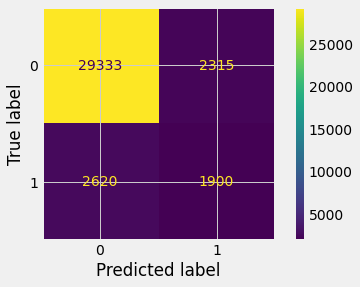

Confusion matrix: 
 TP: 1900 
 TN: 29333 
 FP: 2315 
 FN: 2620
Precision score: 0.45077105575326215
Recall score: 0.42035398230088494
F measure: 0.4350314825414997


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_train)
print("Accuracy of MLP Model is: {}".format(accuracy_score(y_train,y_pred)))
results = confusion_matrix(y_pred,y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=results, display_labels=model.classes_)
disp.plot()
plt.show()
TN,FP,FN,TP = results.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print('Confusion matrix: \n TP: {} \n TN: {} \n FP: {} \n FN: {}'.format(TP, TN, FP, FN))
print('Precision score: {}'.format(precision))
print('Recall score: {}'.format(recall))
print('F measure: {}'.format(F1))

*** Multi layer Perceptron Test set***

Accuracy of MLP Model is: 0.8624350326219175


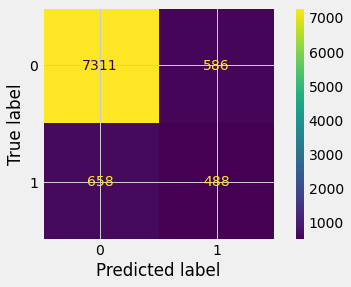

Confusion matrix: 
 TP: 488 
 TN: 7311 
 FP: 586 
 FN: 658
Precision score: 0.4543761638733706
Recall score: 0.4258289703315881
F measure: 0.43963963963963965


In [ ]:

y_pred = mlp.predict(X_test)
print("Accuracy of MLP Model is: {}".format(accuracy_score(y_test,y_pred)))
results = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=results, display_labels=model.classes_)
disp.plot()
plt.show()
TN,FP,FN,TP = results.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print('Confusion matrix: \n TP: {} \n TN: {} \n FP: {} \n FN: {}'.format(TP, TN, FP, FN))
print('Precision score: {}'.format(precision))
print('Recall score: {}'.format(recall))
print('F measure: {}'.format(F1))

***Multi layer Perceptron training set-Modified***

Accuracy of MLP Model is: 0.8870272063702721


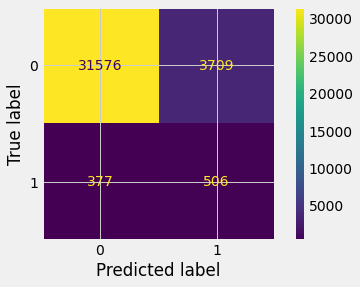

Confusion matrix: 
 TP: 506 
 TN: 31576 
 FP: 3709 
 FN: 377
Precision score: 0.12004744958481613
Recall score: 0.5730464326160816
F measure: 0.19850921930168694


In [ ]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings("always")
mlp = MLPClassifier(hidden_layer_sizes=(1000,1000,1000), learning_rate_init=0.001, 
                    activation='logistic', early_stopping=True, 
                    validation_fraction=0.3, max_iter=1000)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_train)
print("Accuracy of MLP Model is: {}".format(accuracy_score(y_train,y_pred)))
results = confusion_matrix(y_pred,y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=results, display_labels=model.classes_)
disp.plot()
plt.show()
TN,FP,FN,TP = results.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print('Confusion matrix: \n TP: {} \n TN: {} \n FP: {} \n FN: {}'.format(TP, TN, FP, FN))
print('Precision score: {}'.format(precision))
print('Recall score: {}'.format(recall))
print('F measure: {}'.format(F1))

***Multi layer Perceptron test set-Modified***

Accuracy of MLP Model is: 0.8876479044564857


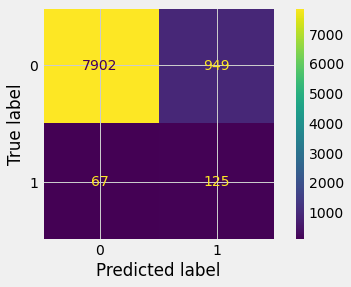

Confusion matrix: 
 TP: 125 
 TN: 7902 
 FP: 949 
 FN: 67
Precision score: 0.11638733705772812
Recall score: 0.6510416666666666
F measure: 0.19747235387045817


In [ ]:
y_pred = mlp.predict(X_test)
print("Accuracy of MLP Model is: {}".format(accuracy_score(y_test,y_pred)))
results = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=results, display_labels=model.classes_)
disp.plot()
plt.show()
TN,FP,FN,TP = results.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print('Confusion matrix: \n TP: {} \n TN: {} \n FP: {} \n FN: {}'.format(TP, TN, FP, FN))
print('Precision score: {}'.format(precision))
print('Recall score: {}'.format(recall))
print('F measure: {}'.format(F1))